## Campus Recruitment
<p>In this notebook, I wil be analysing if someone from a school will be placed based on ssc_p, hsc_p, degree_p,etest_p,workex_Yes,mba_p <p>
<p>Link to dataset:
https://www.kaggle.com/benroshan/factors-affecting-campus-placement

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
data= pd.read_csv('Placement_Data_Full_Class.csv')

In [91]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [92]:
new=pd.get_dummies(data,columns=['status'])

In [93]:
new.drop('status_Not Placed',axis=1,inplace=True)

In [94]:
new['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [95]:
new['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [96]:
new=pd.get_dummies(new,columns=['gender'])

In [97]:
new.rename(columns={'gender_M':'Male'},inplace=True)

In [98]:
new.drop('gender_F',axis=1, inplace=True)

In [99]:
new

,sl_no,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status_Placed,Male
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,1,1
1,2,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,1,1
2,3,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,1,1
3,4,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN,0,1
4,5,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0,1,1
211,212,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0,1,1
212,213,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0,1,1
213,214,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,204000.0,1,0


In [100]:
new=pd.get_dummies(new, columns=['workex'])

In [101]:
new.drop('workex_No',axis=1, inplace=True)

In [102]:
new.rename(columns={'workex_Yes':'Works'})

,sl_no,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,specialisation,mba_p,salary,status_Placed,Male,Works
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,55.0,Mkt&HR,58.80,270000.0,1,1,0
1,2,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,86.5,Mkt&Fin,66.28,200000.0,1,1,1
2,3,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,75.0,Mkt&Fin,57.80,250000.0,1,1,0
3,4,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,66.0,Mkt&HR,59.43,NaN,0,1,0
4,5,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,96.8,Mkt&Fin,55.50,425000.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,91.0,Mkt&Fin,74.49,400000.0,1,1,0
211,212,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,74.0,Mkt&Fin,53.62,275000.0,1,1,0
212,213,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,59.0,Mkt&Fin,69.72,295000.0,1,1,1
213,214,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,70.0,Mkt&HR,60.23,204000.0,1,0,0


In [103]:
pd.get_dummies(new, columns=['degree_t'])

,sl_no,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,etest_p,specialisation,mba_p,salary,status_Placed,Male,workex_Yes,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,Others,91.00,Others,Commerce,58.00,55.0,Mkt&HR,58.80,270000.0,1,1,0,0,0,1
1,2,79.33,Central,78.33,Others,Science,77.48,86.5,Mkt&Fin,66.28,200000.0,1,1,1,0,0,1
2,3,65.00,Central,68.00,Central,Arts,64.00,75.0,Mkt&Fin,57.80,250000.0,1,1,0,1,0,0
3,4,56.00,Central,52.00,Central,Science,52.00,66.0,Mkt&HR,59.43,NaN,0,1,0,0,0,1
4,5,85.80,Central,73.60,Central,Commerce,73.30,96.8,Mkt&Fin,55.50,425000.0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,Others,82.00,Others,Commerce,77.60,91.0,Mkt&Fin,74.49,400000.0,1,1,0,1,0,0
211,212,58.00,Others,60.00,Others,Science,72.00,74.0,Mkt&Fin,53.62,275000.0,1,1,0,0,0,1
212,213,67.00,Others,67.00,Others,Commerce,73.00,59.0,Mkt&Fin,69.72,295000.0,1,1,1,1,0,0
213,214,74.00,Others,66.00,Others,Commerce,58.00,70.0,Mkt&HR,60.23,204000.0,1,0,0,1,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Taking a look at the profile
It seems there are more placed than not placed and more male comrpared to female

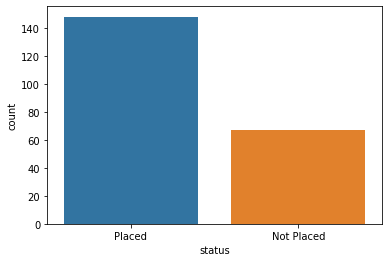

In [7]:
sns.countplot(data=data,x='status')

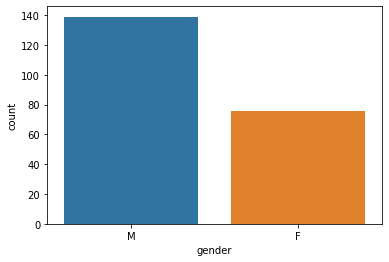

In [8]:
sns.countplot(data=data,x='gender')

#### Correlation between atributes
There doesn't seem to be a strong correlation 

In [10]:
data.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


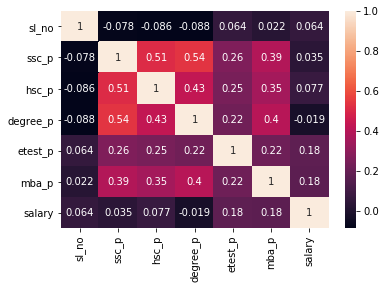

In [11]:
sns.heatmap(data.corr(),annot=True)

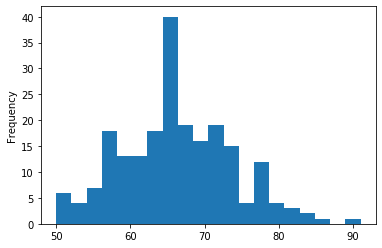

In [18]:
data['degree_p'].plot(kind='hist',bins=20)

In [78]:
new

,sl_no,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,specialisation,mba_p,salary,status_Placed,Male,workex_Yes
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,55.0,Mkt&HR,58.80,270000.0,1,1,0
1,2,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,86.5,Mkt&Fin,66.28,200000.0,1,1,1
2,3,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,75.0,Mkt&Fin,57.80,250000.0,1,1,0
4,5,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,96.8,Mkt&Fin,55.50,425000.0,1,1,0
7,8,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,67.0,Mkt&Fin,62.14,252000.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,67.0,Mkt&Fin,56.49,216000.0,1,1,0
210,211,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,91.0,Mkt&Fin,74.49,400000.0,1,1,0
211,212,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,74.0,Mkt&Fin,53.62,275000.0,1,1,0
212,213,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,59.0,Mkt&Fin,69.72,295000.0,1,1,1


In [105]:
new['status_Placed'].unique()

array([1, 0], dtype=uint8)

#### Here is where the machine learning model takes place. In this example, will be using a Logistic Regression to determine whether or not someone got placed.

In [106]:
from sklearn.model_selection import train_test_split

In [111]:
X = new[['ssc_p', 'hsc_p', 'degree_p','etest_p','workex_Yes','mba_p']]
y = new['status_Placed']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
predictions = logmodel.predict(X_test)

In [119]:
from sklearn.metrics import classification_report

In [120]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.57      0.65        21
           1       0.82      0.91      0.86        44

    accuracy                           0.80        65
   macro avg       0.78      0.74      0.75        65
weighted avg       0.79      0.80      0.79        65



In [128]:
logmodel.predict([[67.00,91.00,58.00,55.0,1,58.80]])

array([1], dtype=uint8)